# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import logging
from pathlib import Path

from PIL import Image
from google import genai

import tt

LOG = logging.getLogger(__name__)
tt.logging_init()

# logging.root.manager.loggerDict
logging.getLogger("google_genai").setLevel(logging.WARNING)
logging.getLogger("httpx").setLevel(logging.WARNING)

In [3]:
CLASSES = [
    "chicken",
    "cow",
    "creeper",
    "enderman",
    "pig",
    "sheep",
    "skeleton",
    "spider",
    "villager",
    "zombie",
]
CLASSES.sort()
CLASSES_MINECRAFT = [f"minecraft {x}" for x in CLASSES]

flash = "gemini-2.5-flash"
flash_lite = "gemini-2.5-flash-lite"
prompt_short = f"""Detect {", ".join(CLASSES)}. Return AT MOST 20 detections."""

mobs_path = Path.home() / "src/data/mobs1/640"

QCFG = tt.GeminiQueryConfig(prompt_short, CLASSES)

# File upload

In [4]:
GF = tt.GeminiFileAPI()
# GF.upload_dir(mobs_path)
GF.sync()
print(GF.gfiles)

[16:45:54]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files "HTTP/1.1 200 OK"
[16:45:54]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files?pageToken=ciEKD4IBDAjryarIBhCAm5m_AwoOQgxyZG56ZWJhOGdsZXo "HTTP/1.1 200 OK"
[16:45:54]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files?pageToken=ciAKDoIBCwjayarIBhDo7ehPCg5CDG9wdDMwNHdpOGV4Mw "HTTP/1.1 200 OK"
[16:45:54]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files?pageToken=ciAKDoIBCwjIyarIBhD4yIw1Cg5CDGZ1NWFpcTZ6bXZxdQ "HTTP/1.1 200 OK"
[16:45:54]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files?pageToken=ciAKDoIBCwi2yarIBhDo7sdMCg5CDDF3Y3J1azNnZTdvbw "HTTP/1.1 200 OK"
[16:45:55]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files "HTTP/1.1 200 OK"
[16:45:55]:[INFO]:(httpx): HTTP Request: GET https://generative

[File(
  create_time=datetime.datetime(2025, 11, 5, 1, 14, 34, 901789, tzinfo=TzInfo(0)),
  display_name='/Users/joe/src/data/mobs1/640/ff14c8a4-2024-10-20_22.23.01.png',
  expiration_time=datetime.datetime(2025, 11, 7, 1, 14, 34, 705904, tzinfo=TzInfo(0)),
  mime_type='image/png',
  name='files/4nwa3g6ni1f9',
  sha256_hash='NjEyMmFkN2ExZjk3NTUwZWRkMzczZjcxN2ZiYzkyMTBjMjJiMjhhODRkNmE0MjEzYTE4NzVjYTQxNzJiZmI3ZA==',
  size_bytes=467090,
  source=<FileSource.UPLOADED: 'UPLOADED'>,
  state=<FileState.ACTIVE: 'ACTIVE'>,
  update_time=datetime.datetime(2025, 11, 5, 1, 14, 34, 901789, tzinfo=TzInfo(0)),
  uri='https://generativelanguage.googleapis.com/v1beta/files/4nwa3g6ni1f9'
), File(
  create_time=datetime.datetime(2025, 11, 5, 1, 14, 33, 435829, tzinfo=TzInfo(0)),
  display_name='/Users/joe/src/data/mobs1/640/f21b358a-2024-10-20_22.22.12.png',
  expiration_time=datetime.datetime(2025, 11, 7, 1, 14, 33, 148080, tzinfo=TzInfo(0)),
  mime_type='image/png',
  name='files/cyr911keitti',
  sha2

# 

# Detect

[17:09:40]:[INFO]:(google_genai.models): AFC is enabled with max remote calls: 10.
[17:09:42]:[INFO]:(httpx): HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
[17:09:42]:[INFO]:(tt): RESPONSE len=219 [
  {"box_2d": [468, 289, 577, 356], "label": "sheep"},
  {"box_2d": [320, 539, 406, 629], "label": "spider"},
  {"box_2d": [389, 518, 444, 554], "label": "chicken"},
  {"box_2d": [320, 606, 362, 644], "label": "pig"}
]


[BBox(xyxyn=(0.289, 0.468, 0.356, 0.577), label='sheep'), BBox(xyxyn=(0.539, 0.32, 0.629, 0.406), label='spider'), BBox(xyxyn=(0.518, 0.389, 0.554, 0.444), label='chicken'), BBox(xyxyn=(0.606, 0.32, 0.644, 0.362), label='pig')]


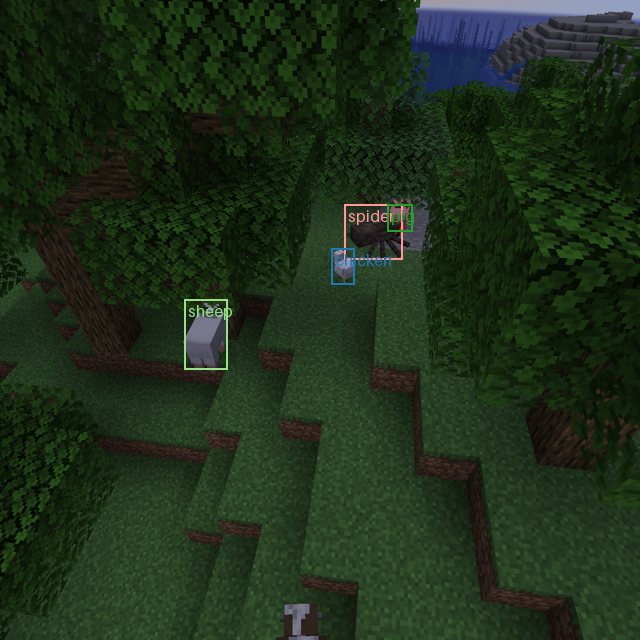

In [7]:
# image640 = Image.open(mobs_path / "06092b21-2024-10-20_22.22.09.png")
# image640 = Image.open(sorted(mobs_path.glob("*.png"))[5])
# This image causes gemini-2.5-flash-lite to detect the pig repeatedly.
image_break = "/Users/joe/src/data/mobs1/640/cda62cfe-2024-10-20_22.22.31.png"
image640 = Image.open(image_break)
# display(image640)
bbox = tt.gemini_gen_bboxes(image640, QCFG)
print(bbox)
display(tt.plot_bb(image640, bbox, CLASSES))

In [8]:
# Display results of one query at a time
def detect_single(gfile: genai.types.File):
    return tt.gemini_detect_gfile(gfile, QCFG)
tt.InferViewer[genai.types.File](detect_single, GF.gfiles, QCFG.classes).show_widget()

interactive(children=(IntSlider(value=0, continuous_update=False, description='Image:', max=44), Output()), _d…

In [14]:
# Run all queries first, then display the results
GFILES10 = GF.gfiles[:10]
results = tt.gemini_detect_multi(GFILES10, QCFG)
tt.InferViewer[tt.ImageResult](lambda x: x, results, QCFG.classes).show_widget()

  0%|          | 0/10 [00:00<?, ?it/s][17:20:11]:[INFO]:(tt): Detect 1/10 file=/Users/joe/src/data/mobs1/640/ff14c8a4-2024-10-20_22.23.01.png
[17:20:12]:[INFO]:(tt): RESPONSE len=56 [
  {"box_2d": [167, 249, 533, 554], "label": "sheep"}
]
 10%|█         | 1/10 [00:00<00:08,  1.01it/s][17:20:12]:[INFO]:(tt): Detect 2/10 file=/Users/joe/src/data/mobs1/640/f21b358a-2024-10-20_22.22.12.png
[17:20:13]:[INFO]:(tt): RESPONSE len=104 [
  {"box_2d": [392, 590, 435, 636], "label": "cow"},
  {"box_2d": [480, 0, 700, 298], "label": "pig"}
]
 20%|██        | 2/10 [00:02<00:08,  1.08s/it][17:20:13]:[INFO]:(tt): Detect 3/10 file=/Users/joe/src/data/mobs1/640/e454a9ab-2024-10-20_22.21.17.png
[17:20:14]:[INFO]:(tt): RESPONSE len=108 [
  {"box_2d": [450, 404, 642, 514], "label": "sheep"},
  {"box_2d": [474, 314, 579, 404], "label": "pig"}
]
 30%|███       | 3/10 [00:03<00:08,  1.16s/it][17:20:14]:[INFO]:(tt): Detect 4/10 file=/Users/joe/src/data/mobs1/640/deaa72ca-2024-10-20_22.21.09.png
[17:20:17]:[INF

interactive(children=(IntSlider(value=0, continuous_update=False, description='Image:', max=9), Output()), _do…

In [10]:
results

[ImageResult(file='/Users/joe/src/data/mobs1/640/ff14c8a4-2024-10-20_22.23.01.png', bboxes=[BBox(xyxyn=(0.249, 0.167, 0.554, 0.533), label='sheep')]),
 ImageResult(file='/Users/joe/src/data/mobs1/640/f21b358a-2024-10-20_22.22.12.png', bboxes=[BBox(xyxyn=(0.0, 0.482, 0.299, 0.7), label='pig'), BBox(xyxyn=(0.586, 0.392, 0.634, 0.434), label='cow')]),
 ImageResult(file='/Users/joe/src/data/mobs1/640/e454a9ab-2024-10-20_22.21.17.png', bboxes=[BBox(xyxyn=(0.404, 0.45, 0.512, 0.642), label='sheep'), BBox(xyxyn=(0.314, 0.472, 0.404, 0.577), label='pig')]),
 ImageResult(file='/Users/joe/src/data/mobs1/640/deaa72ca-2024-10-20_22.21.09.png', bboxes=[BBox(xyxyn=(0.578, 0.36, 0.652, 0.482), label='chicken'), BBox(xyxyn=(0.738, 0.362, 0.794, 0.382), label='pig')]),
 ImageResult(file='/Users/joe/src/data/mobs1/640/dd37605c-2024-10-20_22.22.19.png', bboxes=[BBox(xyxyn=(0.29, 0.3, 0.53, 0.571), label='cow')]),
 ImageResult(file='/Users/joe/src/data/mobs1/640/d476b907-2024-10-20_22.20.54.png', bboxes=[